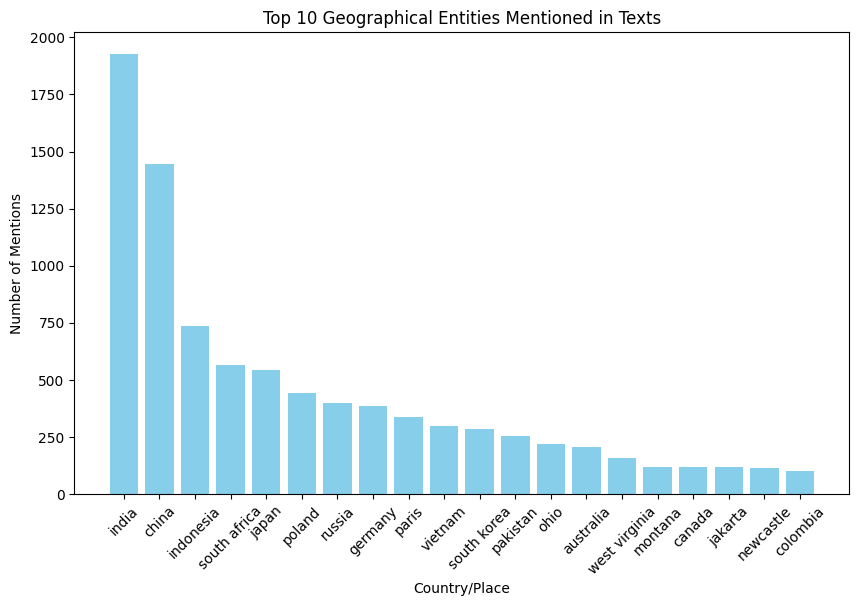

In [4]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import spacy

# Load the spaCy model for NER
nlp = spacy.load('en_core_web_sm')

# Set the directory
directory = 'output_texts/'

# Initialize list to hold texts
texts = []

# Loop through the file range
for i in range(1, 550):
    file_path = os.path.join(directory, f'{i}.txt')

    # Check if the file exists to avoid errors
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            texts.append(file.read())

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('coalwire', '', text)
    text = re.sub('listupdate', '', text)
    text = re.sub('subscription', '', text)
    text = re.sub('toeditor', '', text)

    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing to each text
cleaned_texts = [preprocess(text) for text in texts]



# Extracting named entities
country_mentions = Counter()

for doc in cleaned_texts:
    spacy_doc = nlp(doc)
    for ent in spacy_doc.ents:
        if ent.label_ == "GPE":  # GPE stands for Geopolitical Entity, which includes countries
            country_mentions[ent.text] += 1

# Get the most common countries
most_common_countries = country_mentions.most_common(20)

# Plotting the results
countries, counts = zip(*most_common_countries)
plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='skyblue')
plt.xlabel('Country/Place')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Geographical Entities Mentioned in Texts')
plt.xticks(rotation=45)
plt.show()


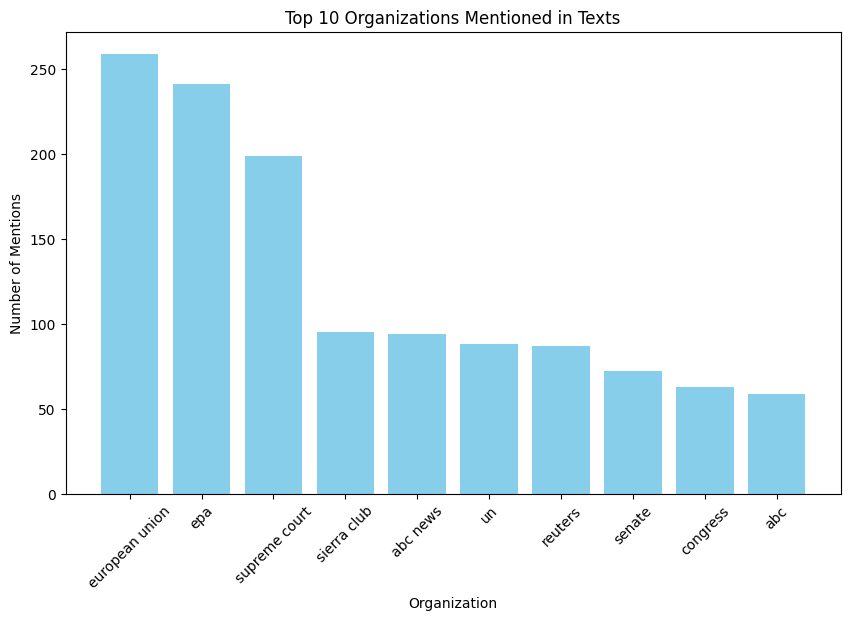

In [5]:
# Extracting named entities
organization_mentions = Counter()

for doc in cleaned_texts:
    spacy_doc = nlp(doc)
    for ent in spacy_doc.ents:
        if ent.label_ == "ORG":  # ORG stands for organizations
            organization_mentions[ent.text] += 1

# Get the most common organizations
most_common_organizations = organization_mentions.most_common(10)

# Plotting the results
organizations, counts = zip(*most_common_organizations)
plt.figure(figsize=(10, 6))
plt.bar(organizations, counts, color='skyblue')
plt.xlabel('Organization')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Organizations Mentioned in Texts')
plt.xticks(rotation=45)
plt.show()